# Read sensitivity kernel

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_0.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read sensitivity kernel
group   = "model"          # "src_$src_name"
dataset = "Ks_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()

# we can access 3D kernel related to slowness
tmp = data_field[dataset]
print("3D slowness kernel shape: ", tmp.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = data_field.interp_dep(depth, field=dataset)
longitude   = tmp[:,0]
latitude    = tmp[:,1]
Ks          = tmp[:,2]

# Similarly, we do the same process for kernels related to xi and eta
dataset = "Kxi_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kxi = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Keta_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Keta = data_field.interp_dep(depth, field=dataset)[:,2]

3D slowness kernel shape:  (7, 201, 201)


# Pygmt plot time field and adjoint field

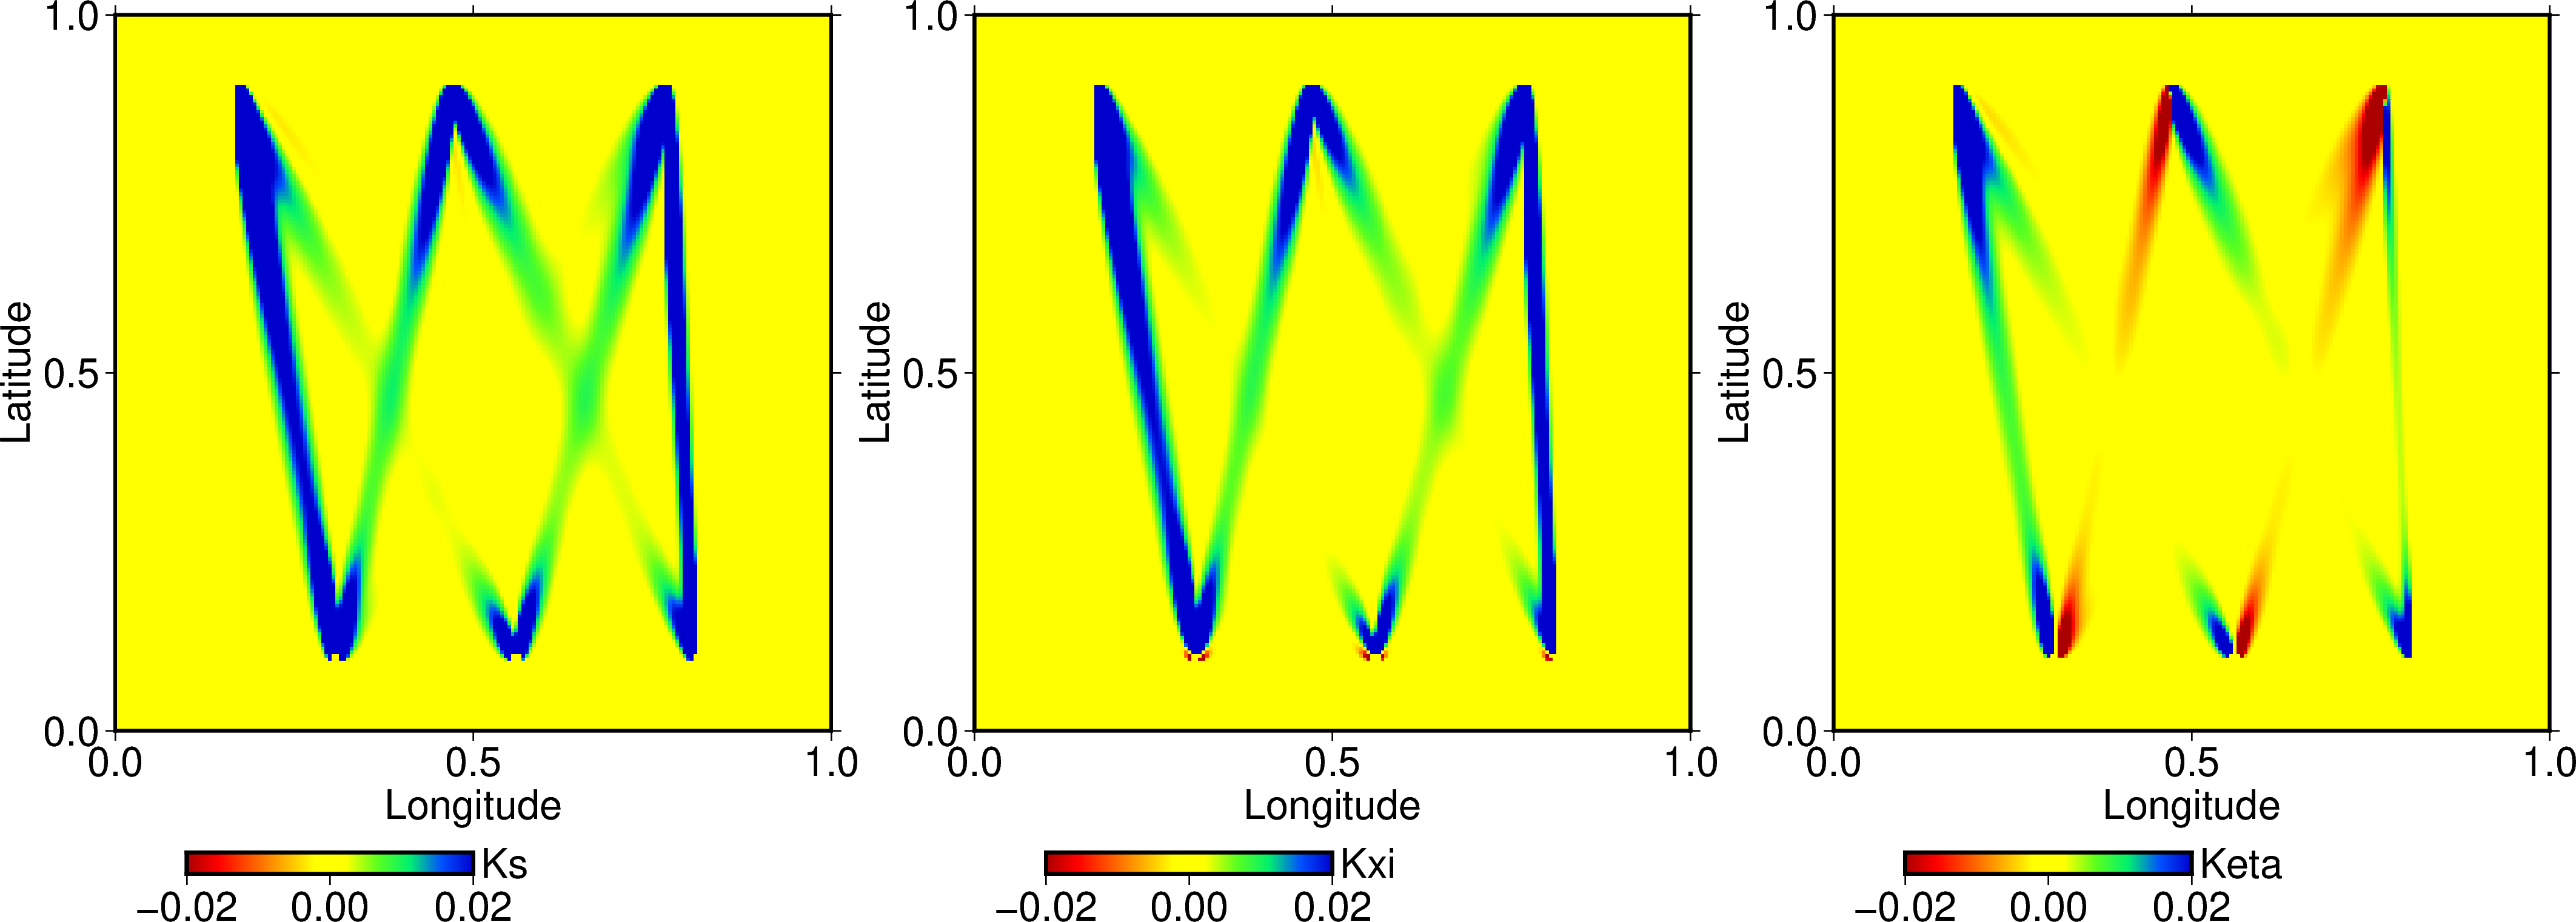

In [3]:
# pygmt plot
import pygmt
pygmt.config(FONT="16p", IO_SEGMENT_MARKER="<<<")

region = [0,1,0,1]
projection = "X10c/10c"
frame = ["xa0.5+lLongitude", "ya0.5+lLatitude", "nSWe"]

fig = pygmt.Figure()

# ----------- plot Ks field ------------
pygmt.makecpt(cmap="seis", series=[-0.02, 0.02], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Ks, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(0.02),"y+lKs"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)


# ----------- plot Kxi field ------------
fig.shift_origin(xshift= 12,)
pygmt.makecpt(cmap="seis", series=[-0.02, 0.02], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Kxi, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(0.02),"y+lKxi"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

# ----------- plot Keta field ------------
fig.shift_origin(xshift= 12,)
pygmt.makecpt(cmap="seis", series=[-0.02, 0.02], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Keta, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(0.02),"y+lKeta"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

fig.show()
fig.savefig('img/4a_kernel.png')

# read and plot model update

Update of slowness, xi, and eta can be regarded as the rescaled sensitivity kernel of slowness, xi, and eta smoothed by inversion grid parameterizartion.

In [4]:
dataset = "Ks_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Ks_update = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Kxi_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kxi_update = data_field.interp_dep(depth, field=dataset)[:,2]

dataset = "Keta_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Keta_update = data_field.interp_dep(depth, field=dataset)[:,2]

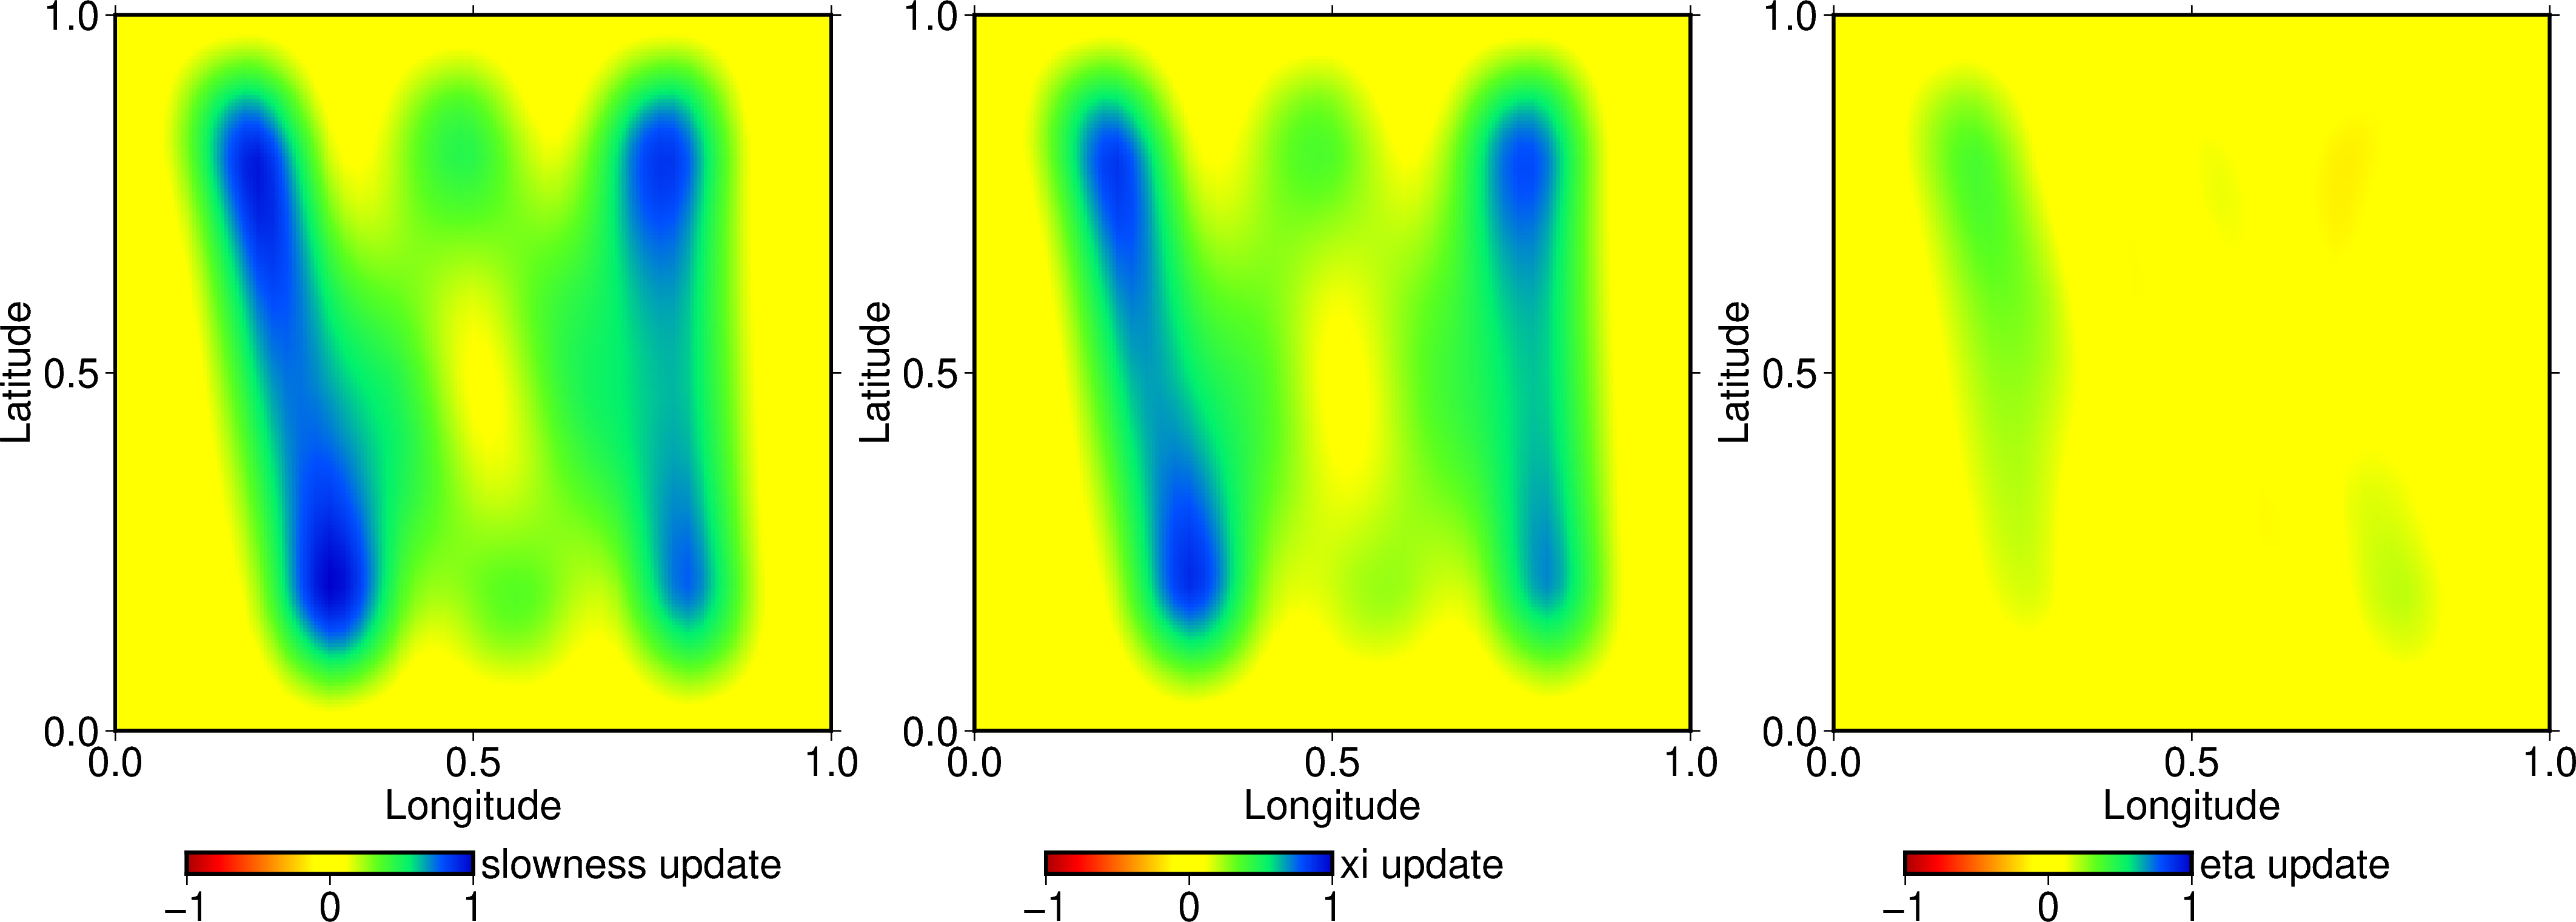

In [7]:
# pygmt plot
import pygmt
from pygmt.clib import Session
with pygmt.clib.Session() as session:
    session.call_module('gmtset', 'FONT 16p')
pygmt.config(IO_SEGMENT_MARKER="<<<")

region = [0,1,0,1]
projection = "X10c/10c"
frame = ["xa0.5+lLongitude", "ya0.5+lLatitude", "nSWe"]

fig = pygmt.Figure()

# ----------- plot Ks field ------------
pygmt.makecpt(cmap="seis", series=[-1, 1], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Ks_update, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(1),"y+lslowness update"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)


# ----------- plot Kxi field ------------
fig.shift_origin(xshift= 12,)
pygmt.makecpt(cmap="seis", series=[-1, 1], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Kxi_update, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(1),"y+lxi update"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

# ----------- plot Keta field ------------
fig.shift_origin(xshift= 12,)
pygmt.makecpt(cmap="seis", series=[-1, 1], background=True, reverse=False)
grid = pygmt.xyz2grd(x=longitude, y=latitude, z=Keta_update, spacing=0.005,region=region,)
fig.grdimage(frame=frame,grid = grid,projection=projection, region=region) # nan_transparent may work

fig.shift_origin(xshift= 1, yshift=-2)
fig.colorbar(frame = ["a%f"%(1),"y+leta update"], position="+w4c/0.3c+h") # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift=-1, yshift=+2)

fig.show()
fig.savefig('img/4b_model_update.png')